## Handwritten Digits (MNIST) Image Classification using CNN

In [29]:
import tensorflow as tf

In [30]:
# Loading MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Data Preprocessing

- Normalization - Scaling pixel values from [0, 255] to [0, 1] to improve numerical stability.

- Channel Expansion - Reshaping images from (28, 28) to (28, 28, 1) since CNN layers expect a channel dimension

In [31]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., None]
x_test = x_test[..., None]

### Model Architecture

- Convolutional Layers - Apply learnable filters, each filter detects features like edges or curves, ReLU introduces non-linearity

- Max Pooling Layers - Reduce spatial dimensions, keep strongest activations and improves translation invariance

- Flatten Layer - Converts feature maps into a 1D vector and prepares data for dense layers

- Fully Connected Layer - Combines learned features and performs high-level reasoning

- Output Layer - Outputs class probabilities. Softmax ensures probabilities sum to 1

In [32]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Model Compilation

Adam Optimizer: adaptive learning rate, Loss Function: suitable for multi-class classification, Metric: accuracy

In [33]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Model Training

Forward pass, loss computation, backpropagation, weight updates. Repeat for each epoch

In [34]:
cnn_model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9592 - loss: 0.1340 - val_accuracy: 0.9842 - val_loss: 0.0540
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9857 - loss: 0.0446 - val_accuracy: 0.9830 - val_loss: 0.0586
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9902 - loss: 0.0308 - val_accuracy: 0.9887 - val_loss: 0.0412
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9930 - loss: 0.0218 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9900 - val_loss: 0.0403


In [35]:
# Model Evaluation
cnn_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0350


[0.034979019314050674, 0.9890999794006348]

In [36]:
# Saving the model
cnn_model.save("cnn_digits.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
The result is probably: 2


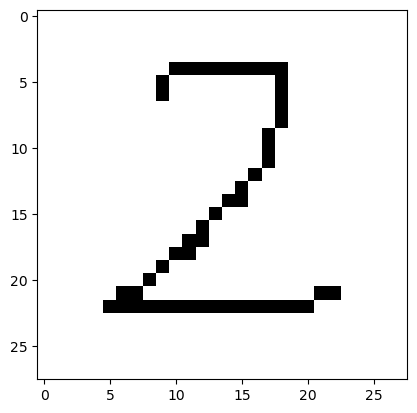

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The result is probably: 3


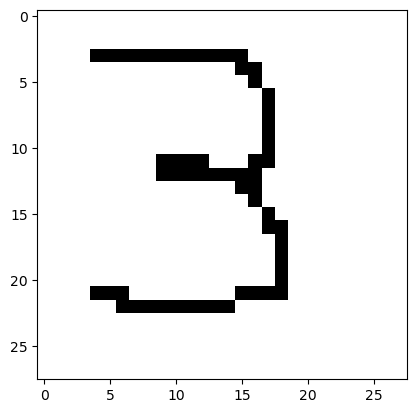

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The result is probably: 7


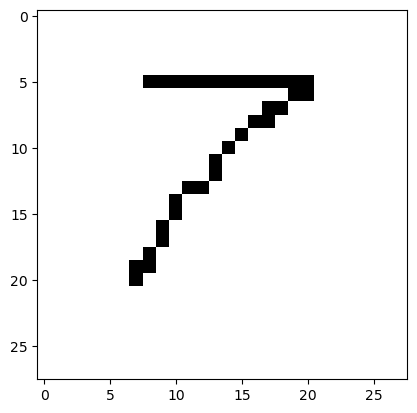

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The result is probably: 8


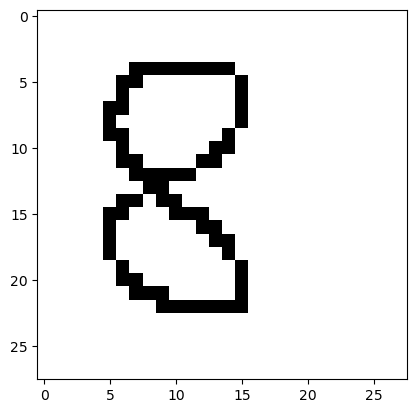

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The result is probably: 5


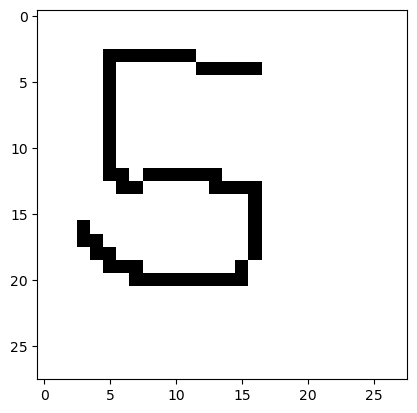

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

for x in range(1, 6):
    # Load image using OpenCV, convert to grayscale
    img = cv.imread(f'predict_images/{x}.png', cv.IMREAD_GRAYSCALE)
    
    # Invert colors (MNIST uses white-on-black)
    img = np.invert(img)

    # Resize to match model input (28x28)
    img = cv.resize(img, (28, 28))

    # Normalize pixel values (if trained that way)
    img = img / 255.0

    # Add the required batch and channel dimensions
    img = img.reshape(1, 28, 28, 1)  # (batch, height, width, channels)

    # argmax returns digit with the highest probability (Softmax outputs probabilities for all digits)
    prediction = cnn_model.predict(img)
    print(f'The result is probably: {np.argmax(prediction)}')

    plt.imshow(img[0].reshape(28, 28), cmap=plt.cm.binary)
    plt.show()